#### CRSIP-DM 기반의 데이터 분석
- test1.csv로 실행
- Maryland 주 whashinton D.C에서 자전거 공유 회사가 모은 데이터 셋
- 출처: https://www.kaggle.com/datasets/rishabhbarman/bike-sharing-dateset

- Fanaee-T, Hadi, and Gama, Joao,
- Event labeling combining ensemble detectors and background knowledge, Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("test1.csv")
print(df.shape)
df.head().T

(10886, 12)


,0,1,2,3,4
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00
season,1,1,1,1,1
holiday,0,0,0,0,0
workingday,0,0,0,0,0
weather,1,1,1,1,1
temp,9.84,9.02,9.02,9.84,9.84
atemp,14.395,13.635,13.635,14.395,14.395
humidity,81,80,80,75,75
windspeed,0.0,0.0,0.0,0.0,0.0
casual,3,8,5,3,0


In [5]:
df.head().T

,0,1,2,3,4
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00
season,1,1,1,1,1
holiday,0,0,0,0,0
workingday,0,0,0,0,0
weather,1,1,1,1,1
temp,9.84,9.02,9.02,9.84,9.84
atemp,14.395,13.635,13.635,14.395,14.395
humidity,81,80,80,75,75
windspeed,0.0,0.0,0.0,0.0,0.0
casual,3,8,5,3,0


#### Business Understanding
- 자전거라는 상품을 대여
- 대여되지 않은 자전거 대수가 적을 수록 사업이 잘 된다고 판단
- 수요량을 잘 이해하고 있다면 인력아니 자원 할당의 최적화가 가능
- 방향성: 요일, 날짜, 시간, 날씨에 따라 고객들의 서비스 이용량 증감을 파악
- 서비스 이용량 증감에 영향을 미친 요소가 무엇인가?
- 서비스 이용자의 가입자 비가입자 비율 비교


In [7]:
df['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

#### Data understanding
- 2011~2012년의 2년치 데이터
- 시간대별로 저장
- 날짜정보 : datetime, season, holiday, workingday
- 기상정보 : weather, temp, atemp, humidity, windspeed
- 이용량정보 : casual, registered, cound

In [9]:
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [10]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

- year, month별로 이용량
- 시간별 이용량
- 

In [12]:
from datetime import datetime

In [13]:
# str = df.iloc[0]['datetime']
# date = datetime.strptime(str, '%Y-%m-%d %H:%M:%S')

years = []
months = []
hours = []
for row in range(len(df)):
    str = df.iloc[row]['datetime']
    date = datetime.strptime(str, '%Y-%m-%d %H:%M:%S')

    years.append(date.year)
    months.append(date.month)
    hours.append(date.hour)

df['year'] = years
df['month'] = months
df['hour'] = hours

In [14]:
df['dayofweek'] = df['datetime'].apply(lambda x: pd.to_datetime(x).dayofweek)

In [15]:
years[-2]

2012

In [16]:
df.to_csv('test1_modify.csv')

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [18]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'hour', 'dayofweek'],
      dtype='object')

#### Data Handling
- 자료 정렬, 입출력 연산 등 공통적으로 수행하는 데이터 처리
- 파일 관점: record를 기반으로 field를 조작
- 데이터프레임 관점: row를 기반으로 column을 조작

In [26]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'hour', 'dayofweek'],
      dtype='object')

In [28]:
sns.scatterplot(data=year_month_group, x='month', y='count', hue='year')
# 2011년에 비하여 2012년의 이용량은 크게 올랐다
# 월별 이용양의 추세는 비슷해 보인다

NameError: name 'year_month_group' is not defined

In [30]:
# registered와 casual은 공유 자전거의 목적이 다른 것으로 예상된다
# 이 예상을 뒷받침할 수 있는 그래프를 그리고 문장을 도출하시오
# 일하지 않는 날에는 Casual이 더 많고 일하는 날에는 회원이 더 많이 사용함
# 회원과 비 회원의 사용빈도 차이는 일하는 날의 차이다.

# 데이터를 표현하고, 해석하는 그래프를 통해 데이터를 잘 표현하는 문장 도출
# 그래프를 해석하여 문장을 도출해 낼 수 있어야 하고, 그 문장의 의미가 있어야 함.

# 울별 회원의 이용량 그래프를 그리고 해석
# 사람의 행동 패턴에 가장 큰 영향을 미칠만한 요소가 무엇인지 파악하시오
# 회원들의 패턴을 기술하세요

# 습도에 따른 이용량에 대해 기술하시오

# 일하는 날과 일하지 않는 날의 차이가 있는지 확인하세요

# 최종적으로 회원들이 공유 자전거를 이용하는 주 목적이 뭉서이라고 예상하는가?

In [32]:
year_month_group = df.groupby(['year','month']).agg({'casual':'sum', 'registered':'sum', 'count':'sum'}) # 월별 이용수
time_group = df.groupby(['year','month', 'hour']).agg({'casual':'mean', 'registered':'mean', 'count':'mean'}) # 시간별 
by_weather = df.groupby(['year','weather']).agg({'casual':'sum', 'registered':'sum', 'count':'sum'}) # 날씨별
# by_season = df.groupby(['season']).agg({'casual':'sum', 'registered':'sum', 'count':'sum'})
# weather = df.groupby(['weather']).agg({'casual':'sum', 'registered':'sum', 'count':'sum'})
# weather = df.groupby(['weather']).agg({'casual':'sum', 'registered':'sum', 'count':'sum'})
# weather = df.groupby(['weather']).agg({'casual':'sum', 'registered':'sum', 'count':'sum'})
# weather = df.groupby(['weather']).agg({'casual':'sum', 'registered':'sum', 'count':'sum'})
# weather = df.groupby(['weather']).agg({'casual':'sum', 'registered':'sum', 'count':'sum'})


In [34]:
by_weather

casual  registered   count
year weather                            
2011 1        114020      440794  554814
     2         34770      148840  183610
     3          7027       36528   43555
2012 1        175880      745369  921249
     2         52476      271074  323550
     3          7956       50578   58534
     4             6         158     164

In [36]:
time_group= time_group.reset_index()

KeyError: 'year'

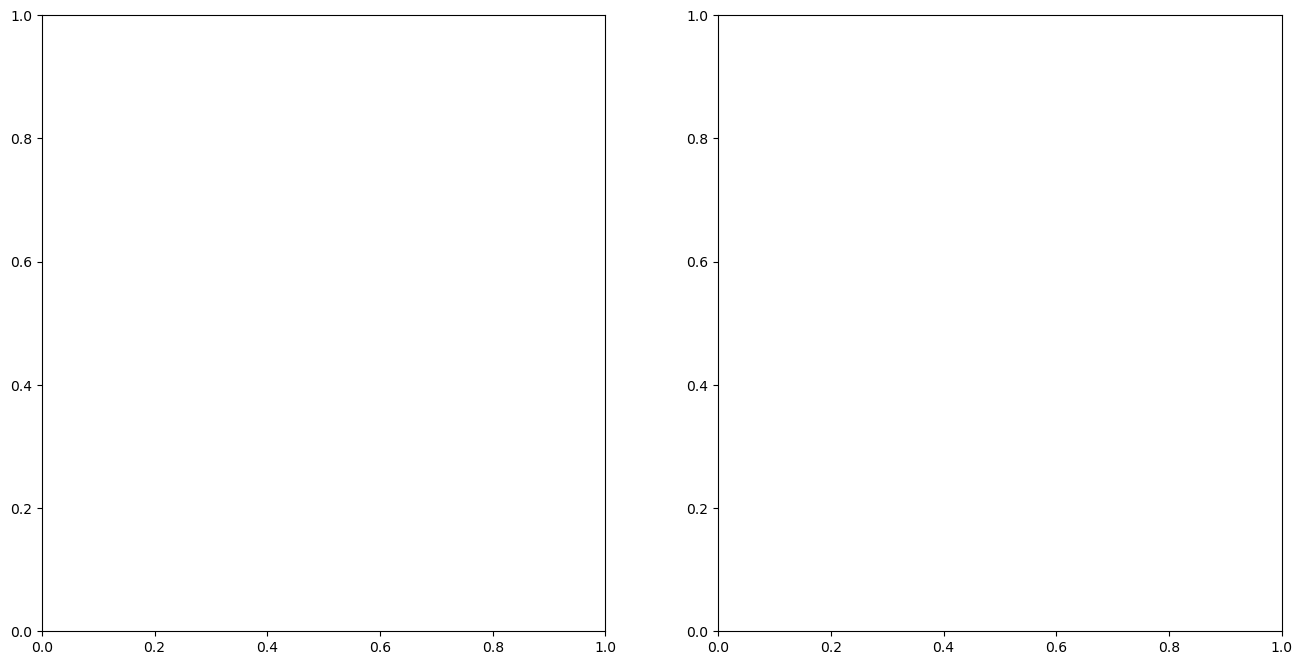

In [38]:
# x_data = np.random.randint(1,100, size=200)
# y_data = np.random.randint(1,100, size=200)

fig, ax = plt.subplots(1, 2, figsize=(16,8))
year2011 = year_month_group[year_month_group['year'] == 2011]
year2012 = year_month_group[year_month_group['year'] == 2012]
ax[0].plot(year2011['month'], year2011['count'])
ax[0].bar(year2011['month']-0.15, year2011['casual'], width = 0.3, label = 'casual') 
ax[0].bar(year2011['month']+0.15, year2011['registered'], width = 0.3, label = 'registered') 
ax[1].plot(year2012['month'], year2012['count'])
ax[1].bar(year2012['month']-0.15, year2012['casual'], width = 0.3, label = 'casual') 
ax[1].bar(year2012['month']+0.15, year2012['registered'], width = 0.3, label = 'registered') 


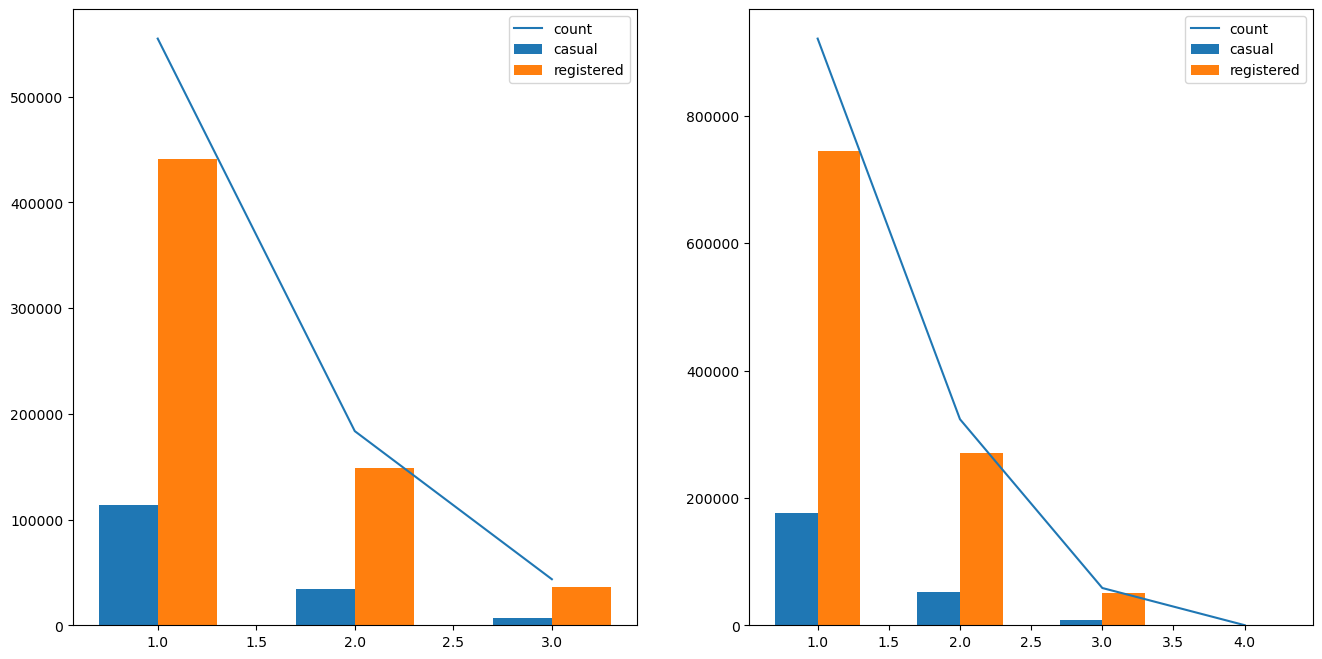

In [41]:
by_weather = by_weather.reset_index()
fig, ax = plt.subplots(1, 2, figsize=(16,8))
by_weather_2011 = by_weather[by_weather['year'] == 2011]
by_weather_2012 = by_weather[by_weather['year'] == 2012]
ax[0].plot(by_weather_2011['weather'], by_weather_2011['count'])
ax[0].bar(by_weather_2011['weather']-0.15, by_weather_2011['casual'], width = 0.3, label = 'casual') 
ax[0].bar(by_weather_2011['weather']+0.15, by_weather_2011['registered'], width = 0.3, label = 'registered') 
ax[0].legend(['count', 'casual', 'registered'])
ax[1].plot(by_weather_2012['weather'], by_weather_2012['count'])
ax[1].bar(by_weather_2012['weather']-0.15, by_weather_2012['casual'], width = 0.3, label = 'casual') 
ax[1].bar(by_weather_2012['weather']+0.15, by_weather_2012['registered'], width = 0.3, label = 'registered') 
ax[1].legend(['count', 'casual', 'registered'])



In [43]:
time_group_2011 = time_group[time_group['year'] == 2011]
time_group2012 = time_group[time_group['year'] == 2012]

In [45]:
time_group_2012.loc[:,'month':'count']

NameError: name 'time_group_2012' is not defined

In [47]:
set(time_group_2011['month'])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [49]:

src = time_group_2011
src2 = time_group_2012

sizex = 6
sizey = 2
fig, ax = plt.subplots(sizex, sizey, figsize=(24,48))

for j in range(sizex):
    for i in range(sizey):
        ax[j][i].bar(src[src['month']==(j*sizey)+i+1]['hour'], src[src['month']==(j*sizey)+i+1]['count'])
        # ax[j][i].plot(src2[src2['month']==(j*sizey)+i+1]['hour'], src2[src2['month']==(j*sizey)+i+1]['count'], )
        # ax[j][i].legend(['2011', '2012'])
        ax[j][i].set_title((j*sizey)+i+1)

NameError: name 'time_group_2012' is not defined

C:\Users\405-11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\405-11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\405-11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\405-11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

<Axes: xlabel='hour', ylabel='casual'>

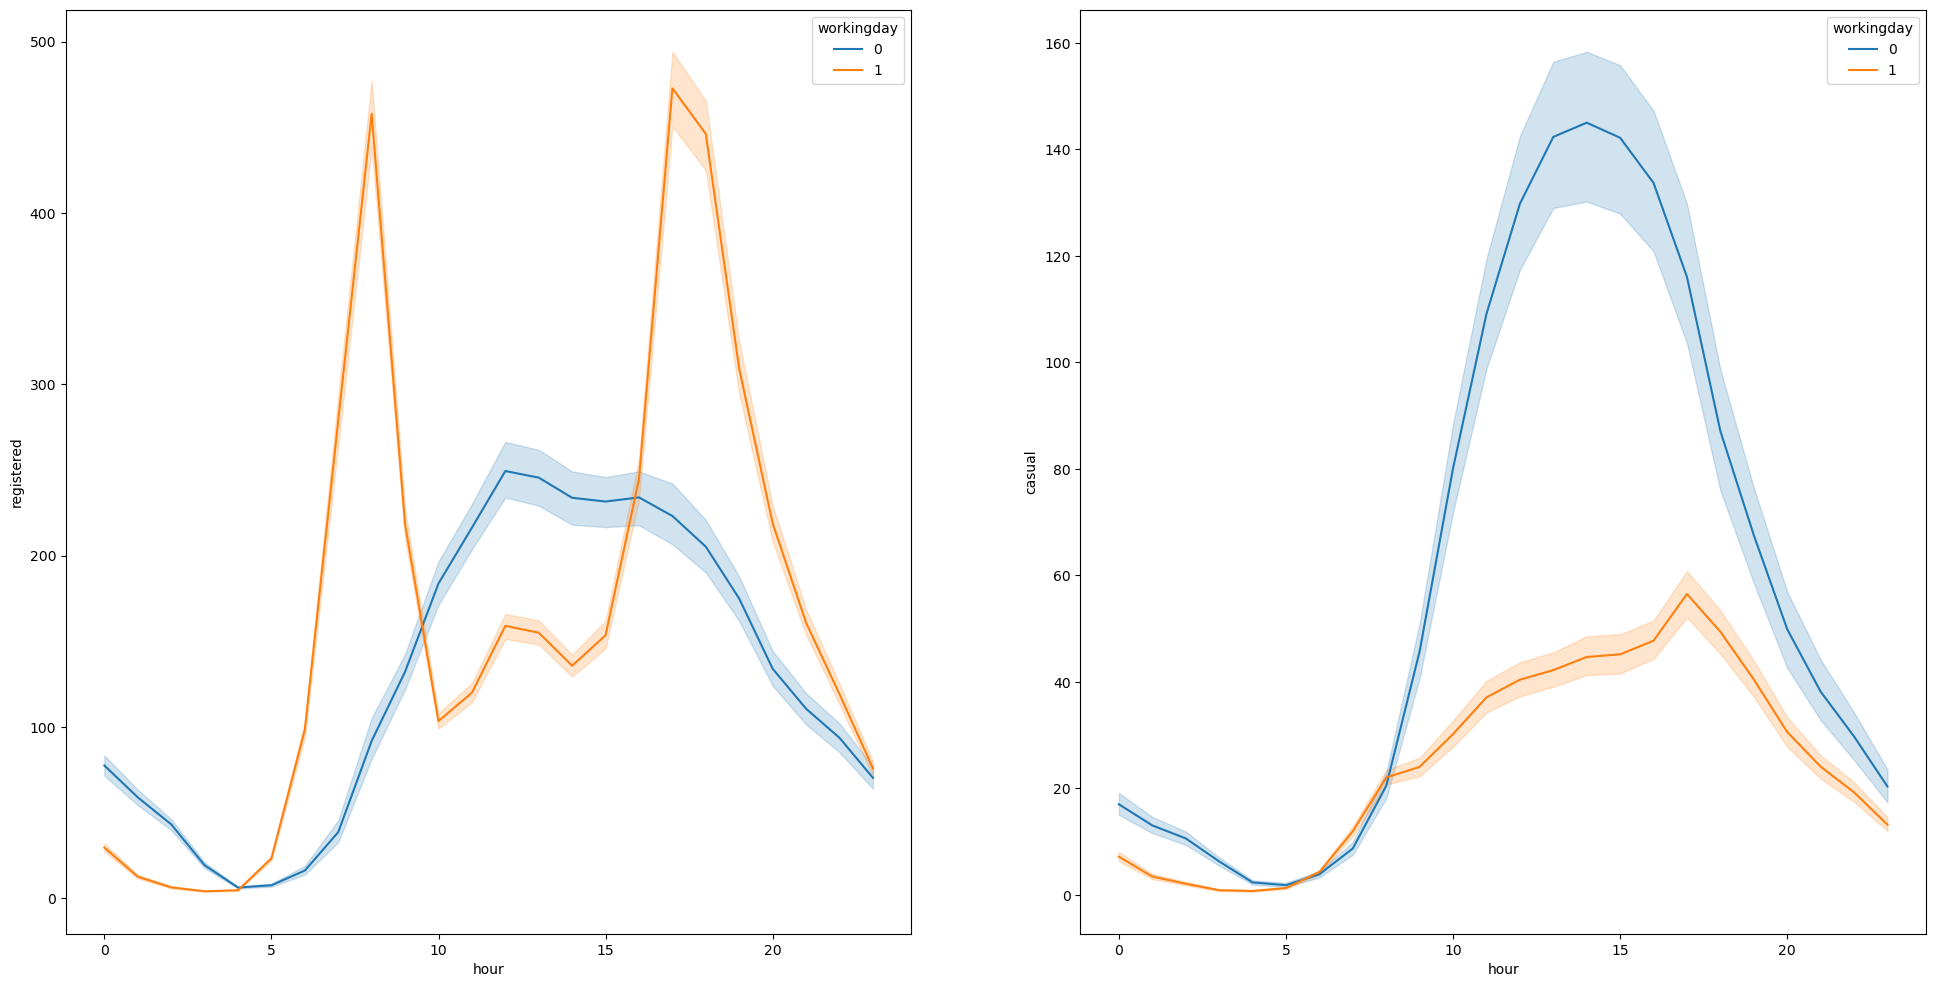

In [52]:

fig, ax = plt.subplots(1, 2, figsize=(24,12))
sns.lineplot(data=df, x='hour', y='registered', ax=ax[0], hue='workingday')
sns.lineplot(data=df, x='hour', y='casual', ax=ax[1], hue='workingday')


# 등록 회원은 출퇴근 용도록 주로 사용
# 비등록 회원은 일하지 않는 날 오후에 사용
# 회원과 비 회원간 전략의 차이가 달라야 함

C:\Users\405-11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\405-11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\405-11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\405-11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

<Axes: xlabel='humidity', ylabel='casual'>

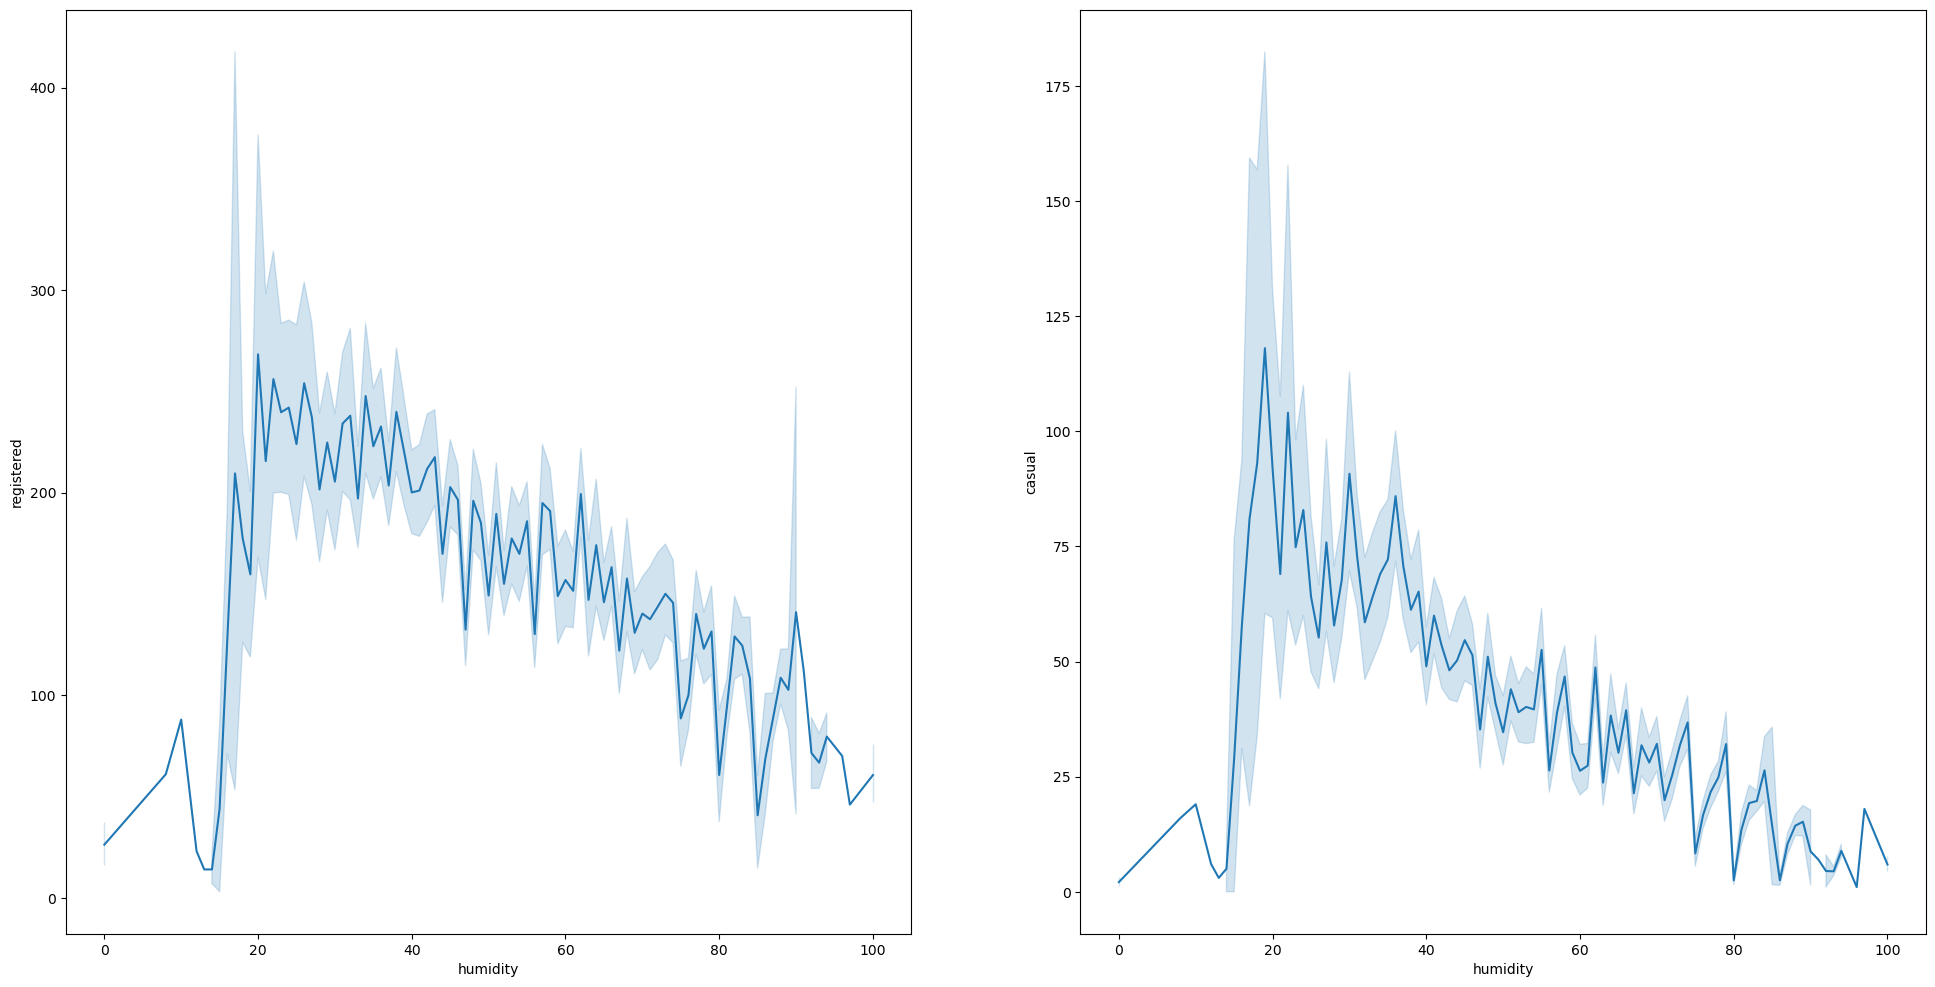

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(24,12))
sns.lineplot(data=df, x='humidity', y='registered', ax=ax[0])
sns.lineplot(data=df, x='humidity', y='casual', ax=ax[1])

<Axes: xlabel='hour', ylabel='casual'>

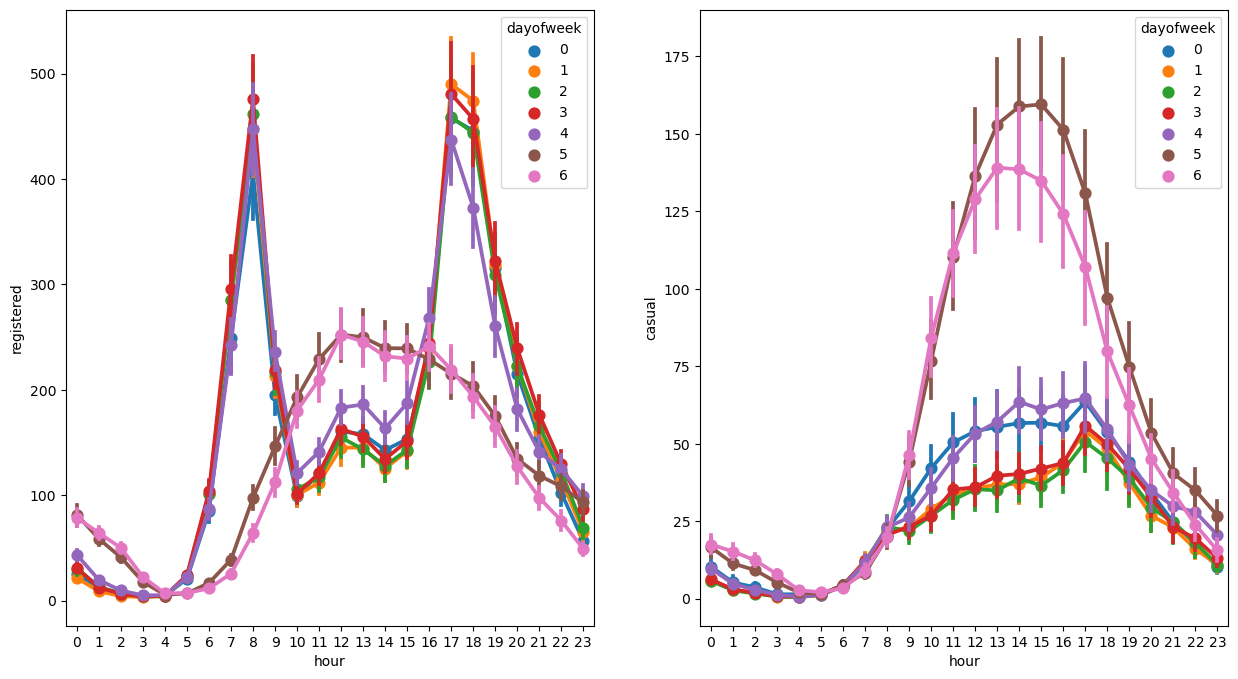

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
sns.pointplot(data=df, x='hour', y='registered', ax=ax[0], hue='dayofweek')
sns.pointplot(data=df, x='hour', y='casual', ax=ax[1], hue='dayofweek')

### Data Preperation

In [110]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'hour', 'dayofweek'],
      dtype='object')

In [126]:
# feature label split
features = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'hour', 'dayofweek']
label = 'count' # 'registered', 'casual'

In [112]:
train, test = df[0::2], df[1::2]


In [114]:
train = train.reset_index()

In [116]:
test = test.reset_index()

In [128]:
x_train, y_train = train[features], train[label]
x_test, y_test = test[features], test[label]


### Modeling
- 지도 학습의 사례 2가지 : 분류(Classfication), 회귀(Regression)
- 예외) Logistic Regression: 회귀같지만 분류임.
- 분류: 객관식, 경우의 수 --> Classfication
- 회귀: 주관식, 숫자  패턴???

#### sklearn(scikit-learn)
- ML 성향이 짙은 알고리즘을 활용하는 파이썬 라이브러리
- Data Science 전반으로 많이 사용함
- 정형 데이터, Dataframe 형태의 데이터 -> ML계열 알고리즘
- 이미지, 영항, 음성, 사람이 사용하는 글 -> DL 계열 알고리즘

In [122]:
from sklearn.ensemble import RandomForestRegressor as rf

In [163]:
# 1. 알고리즘 생성
model = rf(max_features=10)

# 2. 모델 학습
model.fit(x_train, y_train)

RandomForestRegressor(max_features=10)

In [165]:
# 3. 점수확인
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.991889413571153
0.9236436883438188


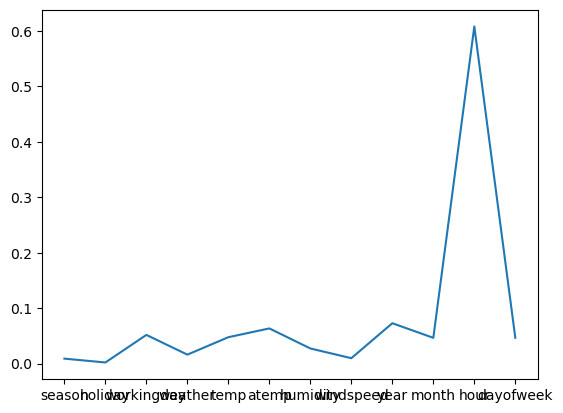

In [153]:
plt.plot(model.feature_names_in_, model.feature_importances_)
